<a href="https://colab.research.google.com/github/ANUJGAUR/Problem-statement-2-sba.gov-datasets-analysis/blob/main/Loan_Amount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

Here i take only 2 datasets similarly we can do for more datasets

In [75]:
#load data
df1 = pd.read_csv('/content/drive/MyDrive/datasets/public_150k_plus_220930.csv')
df2 = pd.read_csv('/content/drive/MyDrive/datasets/public_up_to_150k_1_220930 (1).csv')

In [76]:
#joining dataframe
df = pd.concat([df1,df2])

In [77]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101.0,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [78]:
df.shape

(1868531, 53)

In [79]:
#converting columns name in lowercase for ease in analysis
df.columns=df.columns.str.lower()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868531 entries, 0 to 899999
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loannumber                   int64  
 1   dateapproved                 object 
 2   sbaofficecode                float64
 3   processingmethod             object 
 4   borrowername                 object 
 5   borroweraddress              object 
 6   borrowercity                 object 
 7   borrowerstate                object 
 8   borrowerzip                  object 
 9   loanstatusdate               object 
 10  loanstatus                   object 
 11  term                         int64  
 12  sbaguarantypercentage        int64  
 13  initialapprovalamount        float64
 14  currentapprovalamount        float64
 15  undisbursedamount            float64
 16  franchisename                object 
 17  servicinglenderlocationid    float64
 18  servicinglendername          object 
 19  s

In [81]:
#Checking null values
df.isna().any()

loannumber                     False
dateapproved                   False
sbaofficecode                   True
processingmethod               False
borrowername                    True
borroweraddress                 True
borrowercity                    True
borrowerstate                   True
borrowerzip                     True
loanstatusdate                  True
loanstatus                     False
term                           False
sbaguarantypercentage          False
initialapprovalamount          False
currentapprovalamount          False
undisbursedamount               True
franchisename                   True
servicinglenderlocationid       True
servicinglendername             True
servicinglenderaddress          True
servicinglendercity             True
servicinglenderstate            True
servicinglenderzip              True
ruralurbanindicator            False
hubzoneindicator               False
lmiindicator                    True
businessagedescription          True
p

In [82]:
#Replacing null values with suitable value
df['sbaofficecode'].fillna(0,inplace=True)

df['borrowername'] = df['borrowername'].replace(np.nan,'other')

df['borroweraddress'] = df['borroweraddress'].replace(np.nan,'other')

df['borrowercity'] = df['borrowercity'].replace(np.nan,'other')

df['borrowerstate'] = df['borrowerstate'].replace(np.nan,'other')

df['borrowerzip'] = df['borrowerzip'].replace(np.nan,0)

In [83]:
#Replacing null values with suitable value

df['undisbursedamount'].fillna(0,inplace=True)

df['loanstatusdate'] = df['loanstatusdate'].replace(np.nan,'other')

df['franchisename'] = df['franchisename'].replace(np.nan,'other')

df['servicinglenderlocationid'] = df['servicinglenderlocationid'].replace(np.nan,0)

df['servicinglendername'] = df['servicinglendername'].replace(np.nan,'other')

df['servicinglenderaddress'] = df['servicinglenderaddress'].replace(np.nan,'other')

In [84]:
#Replacing null values with suitable value

df['servicinglendercity'] = df['servicinglendercity'].replace(np.nan,'other')

df['servicinglenderstate'] = df['servicinglenderstate'].replace(np.nan,'other')

df['servicinglenderzip'] = df['servicinglenderzip'].replace(np.nan,0)

In [85]:
#Replacing null values with suitable value

df['projectzip'].fillna(0,inplace=True)

df['lmiindicator'] = df['lmiindicator'].replace(np.nan,'other')

df['businessagedescription'] = df['businessagedescription'].replace(np.nan,'other')

df['projectcity'] = df['projectcity'].replace(np.nan,'other')

df['projectcountyname'] = df['projectcountyname'].replace(np.nan,'other')

df['projectstate'] = df['projectstate'].replace(np.nan,'other')

In [86]:
#Replacing null values with suitable value

df['naicscode'].fillna(0,inplace=True)

df['cd'] = df['cd'].replace(np.nan,'other')

df['jobsreported'] = df['jobsreported'].replace(np.nan,0)

df['utilities_proceed'] = df['utilities_proceed'].replace(np.nan,0)

df['payroll_proceed'] = df['payroll_proceed'].replace(np.nan,df['payroll_proceed'].mean())

df['mortgage_interest_proceed'] = df['mortgage_interest_proceed'].replace(np.nan,df['mortgage_interest_proceed'].mean())

In [87]:
#Replacing null values with suitable value

df['rent_proceed'] = df['rent_proceed'].replace(np.nan,df['rent_proceed'].mean())

df['refinance_eidl_proceed'] = df['refinance_eidl_proceed'].replace(np.nan,df['refinance_eidl_proceed'].mean())

df['businesstype'] = df['businesstype'].replace(np.nan,'other')

df['health_care_proceed'] = df['health_care_proceed'].replace(np.nan,df['health_care_proceed'].mean())

df['debt_interest_proceed'] = df['debt_interest_proceed'].replace(np.nan,df['debt_interest_proceed'].mean())

In [88]:
#Replacing null values with suitable value

df['originatinglenderlocationid'] = df['originatinglenderlocationid'].replace(np.nan,0)

df['originatinglender'] = df['originatinglender'].replace(np.nan,'other')

df['originatinglendercity'] = df['originatinglendercity'].replace(np.nan,'other')

df['originatinglenderstate'] = df['originatinglenderstate'].replace(np.nan,'other')

df['forgivenessamount'] = df['forgivenessamount'].replace(np.nan,df['forgivenessamount'].mean())

df['forgivenessdate'] = df['forgivenessdate'].replace(np.nan,'other')

df['nonprofit'] = df['nonprofit'].replace(np.nan,'other')

In [89]:
#Checking null values again
df.isna().any()

loannumber                     False
dateapproved                   False
sbaofficecode                  False
processingmethod               False
borrowername                   False
borroweraddress                False
borrowercity                   False
borrowerstate                  False
borrowerzip                    False
loanstatusdate                 False
loanstatus                     False
term                           False
sbaguarantypercentage          False
initialapprovalamount          False
currentapprovalamount          False
undisbursedamount              False
franchisename                  False
servicinglenderlocationid      False
servicinglendername            False
servicinglenderaddress         False
servicinglendercity            False
servicinglenderstate           False
servicinglenderzip             False
ruralurbanindicator            False
hubzoneindicator               False
lmiindicator                   False
businessagedescription         False
p

In [90]:
#Checking duplicates
df.duplicated().sum()

0

In [91]:
df.describe(include='all')

,loannumber,dateapproved,sbaofficecode,processingmethod,borrowername,borroweraddress,borrowercity,borrowerstate,borrowerzip,loanstatusdate,...,businesstype,originatinglenderlocationid,originatinglender,originatinglendercity,originatinglenderstate,gender,veteran,nonprofit,forgivenessamount,forgivenessdate
count,1.868531e+06,1868531,1.868531e+06,1868531,1868531,1868531,1868531,1868531,1868531,1868531,...,1868531,1.868531e+06,1868531,1868531,1868531,1868531,1868531,1868531,1.868531e+06,1868531
unique,NaN,243,NaN,2,1612580,1663977,33081,58,900322,728,...,26,NaN,4302,2844,56,3,3,2,NaN,489
top,NaN,05/01/2020,NaN,PPP,FIRST UNITED METHODIST CHURCH,other,Phoenix,CA,85260,other,...,Corporation,NaN,"Bank of America, National Association",CHARLOTTE,CA,Unanswered,Unanswered,other,NaN,other
freq,NaN,178202,NaN,1330360,121,155,29289,600838,1398,120177,...,687090,NaN,115220,137318,275054,1121577,1248251,1789023,NaN,103622
mean,5.410179e+09,NaN,6.950265e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.420380e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.994462e+05,NaN
std,2.549575e+09,NaN,2.653307e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.754523e+05,NaN,NaN,NaN,NaN,NaN,NaN,5.684686e+05,NaN
min,1.000007e+09,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN
25%,3.232537e+09,NaN,4.590000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.102300e+04,NaN,NaN,NaN,NaN,NaN,NaN,3.419833e+04,NaN
50%,5.384607e+09,NaN,6.810000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.746700e+04,NaN,NaN,NaN,NaN,NaN,NaN,1.687464e+05,NaN
75%,7.525432e+09,NaN,9.200000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.883610e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.994462e+05,NaN


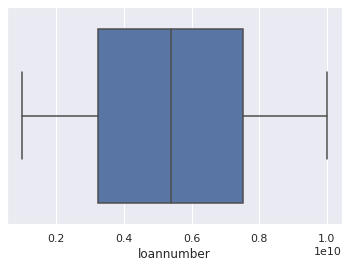

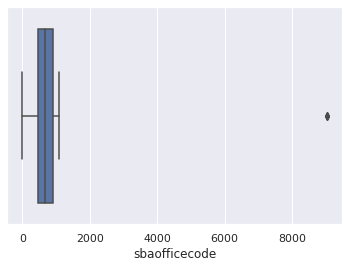

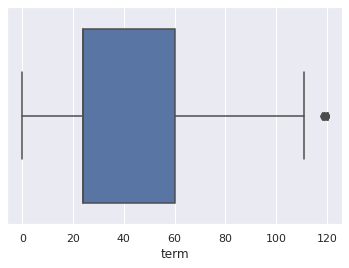

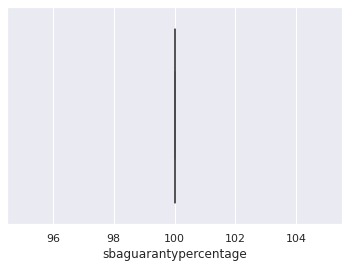

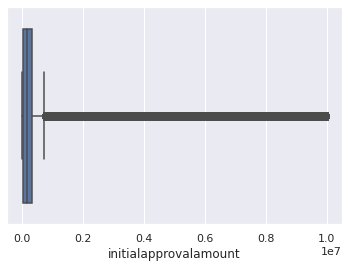

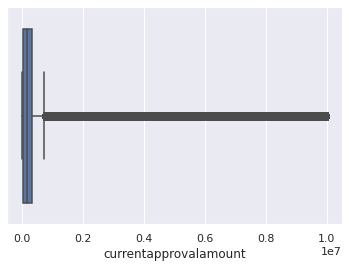

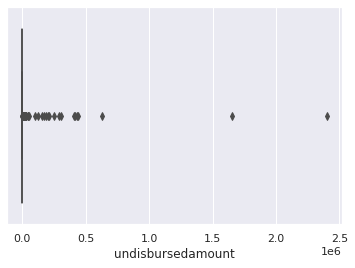

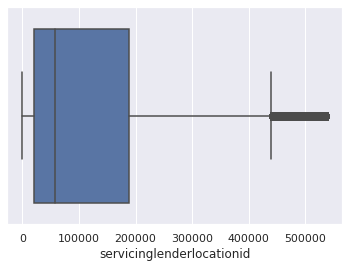

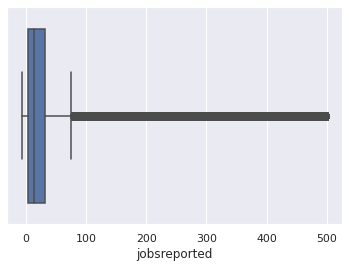

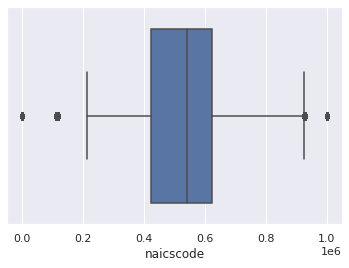

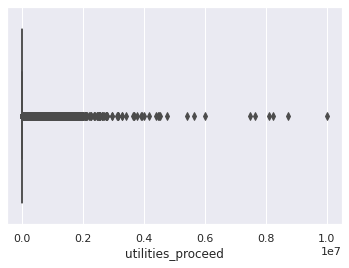

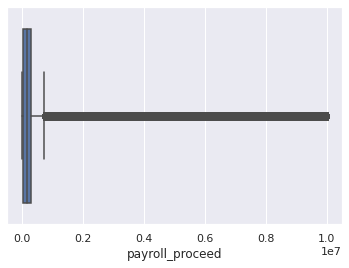

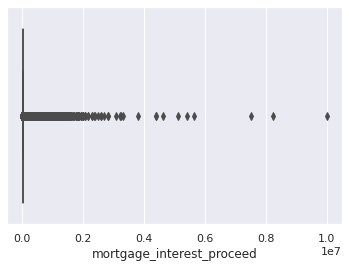

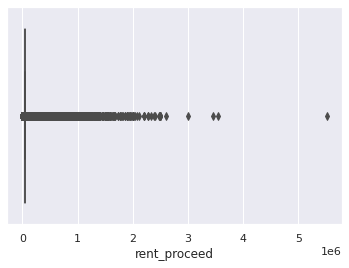

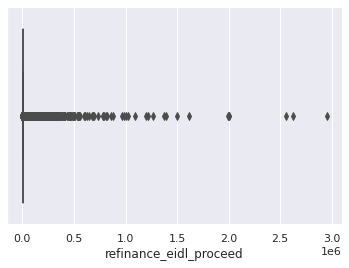

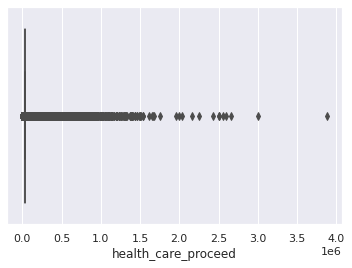

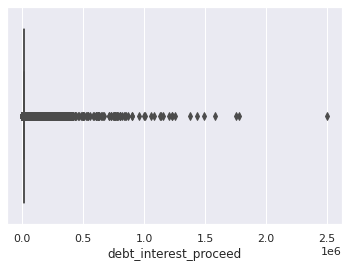

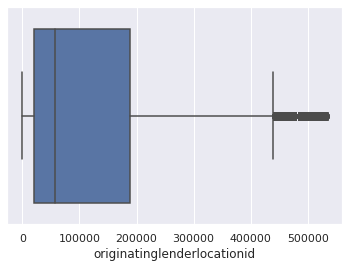

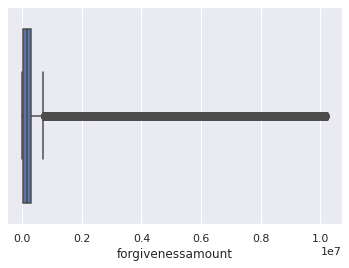

In [92]:
#Checking Outliers
a = df.describe().columns
for i in a:
  sns.boxplot(df[i])
  plt.show()

# **EDA**

---



# **Loan amount**

**State Average vs National Average.**

In [93]:
#Removing outliers
for i in range(0,100,10):
  a = df['initialapprovalamount'].values
  a=np.sort(a)
  print('{} percentile value is {}'.format(i,int(df['initialapprovalamount'].quantile(i/100))))
print('{} percentile value is {}'.format(100,a[-1]))

0 percentile value is 0
10 percentile value is 15400
20 percentile value is 21157
30 percentile value is 38700
40 percentile value is 74238
50 percentile value is 154720
60 percentile value is 195200
70 percentile value is 256700
80 percentile value is 373300
90 percentile value is 668020
100 percentile value is 10000000.0


In [94]:
#Removing outliers
for i in range(90,100,1):
  a = df['initialapprovalamount'].values
  a=np.sort(a)
  print('{} percentile value is {}'.format(i,int(df['initialapprovalamount'].quantile(i/100))))
print('{} percentile value is {}'.format(100,a[-1]))

90 percentile value is 668020
91 percentile value is 726506
92 percentile value is 795300
93 percentile value is 879200
94 percentile value is 984067
95 percentile value is 1117185
96 percentile value is 1302970
97 percentile value is 1567100
98 percentile value is 1975000
99 percentile value is 2676278
100 percentile value is 10000000.0


In [95]:
#Removing outliers
for i in range(0,10,1):
  a = df['initialapprovalamount'].values
  a=np.sort(a)
  print('{} percentile value is {}'.format(i,int(df['initialapprovalamount'].quantile(i/100))))
print('{} percentile value is {}'.format(100,a[-1]))

0 percentile value is 0
1 percentile value is 2164
2 percentile value is 3300
3 percentile value is 4464
4 percentile value is 5687
5 percentile value is 7010
6 percentile value is 8399
7 percentile value is 10000
8 percentile value is 11540
9 percentile value is 13413
100 percentile value is 10000000.0


In [96]:
#Removing outliers
df.drop(df[df['initialapprovalamount']>2676278].index,inplace=True)

In [97]:
sa=df.groupby('borrowerstate').agg({'initialapprovalamount':'mean'})
na = df['initialapprovalamount'].mean().round(2)
print(f'National Average loan amount is {na}')


National Average loan amount is 255109.62


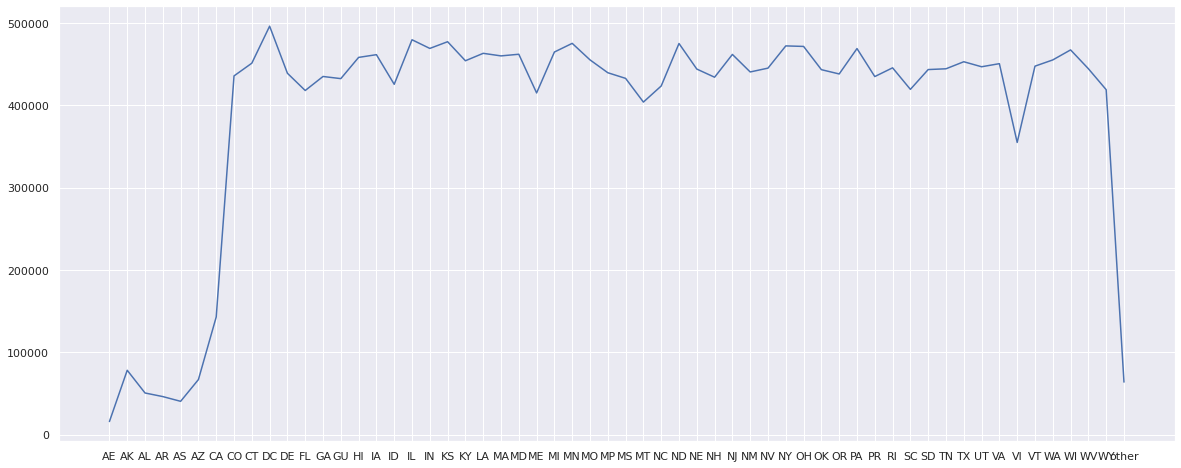

In [98]:
plt.figure(figsize=(20,8))
plt.plot(sa['initialapprovalamount'])
plt.show()

By seeing this graph found that states between the CO and WY are average loan is greater than national average(255109.62)

**Average loan for a particular city.**

In [99]:
print('Average loan for a particular city')
sa

Average loan for a particular city


,initialapprovalamount
borrowerstate,
AE,15996.750000
AK,78241.246437
AL,50653.995790
AR,46283.114020
AS,40533.474815
AZ,66941.789405
CA,142950.453588
CO,435609.057219
CT,451036.596539


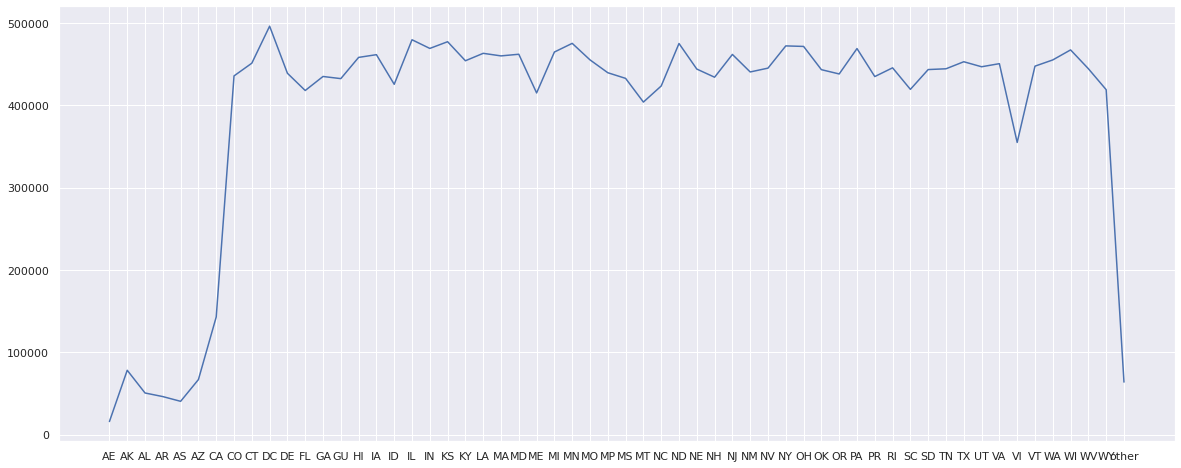

In [100]:
plt.figure(figsize=(20,8))
plt.plot(sa['initialapprovalamount'])
plt.show()

**Loan Amount grouped by other KPIs like Business Type, Race,Gender etc.**

In [122]:
bt=df.groupby('businesstype').agg({'initialapprovalamount':'mean'}).reset_index()
print(' Average Loan Amount according to Business Type')
bt

 Average Loan Amount according to Business Type


,businesstype,initialapprovalamount
0,"501(c) – Non Profit except 3,4,6,",280953.859333
1,501(c)19 – Non Profit Veterans,71608.000000
2,501(c)3 – Non Profit,431672.466017
3,501(c)6 – Non Profit Membership,306641.044368
4,Cooperative,399820.228390
5,Corporation,296833.281459
6,Employee Stock Ownership Plan(ESOP),843115.410917
7,Housing Co-op,341463.590066
8,Independent Contractors,14635.415204
9,Joint Venture,266450.017980


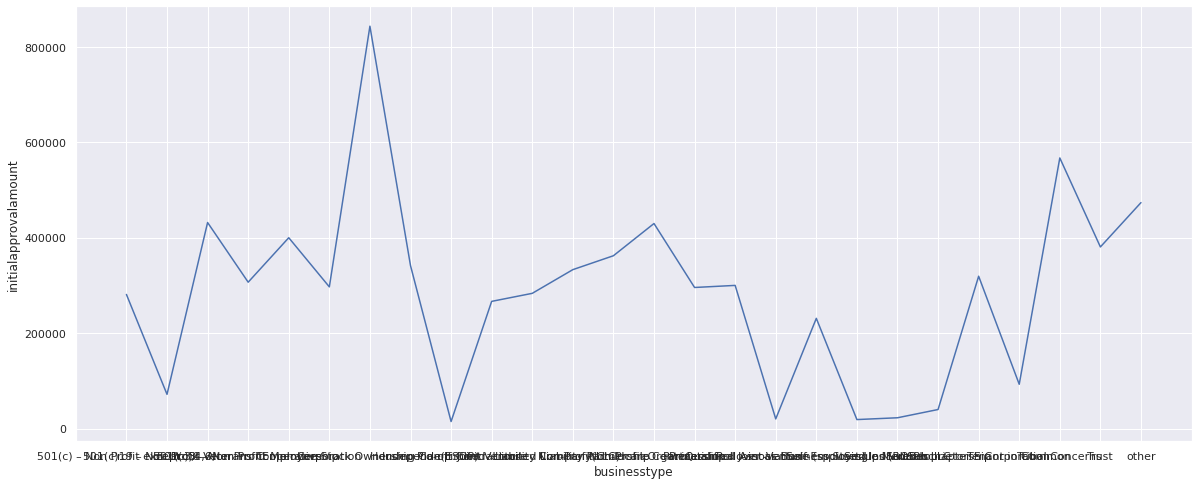

In [126]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'businesstype',y = 'initialapprovalamount',data = bt)
plt.show()

In [103]:
race=df.groupby('race').agg({'initialapprovalamount':'mean'}).reset_index()
print(' Average Loan Amount according to race')
race

 Average Loan Amount according to race


,race,initialapprovalamount
0,American Indian or Alaska Native,165415.276654
1,Asian,156079.965878
2,Black or African American,72393.970494
3,Eskimo & Aleut,65735.600000
4,Multi Group,137583.236842
5,Native Hawaiian or Other Pacific Islander,169318.540289
6,Puerto Rican,307901.835938
7,Unanswered,266286.177734
8,White,261540.276675


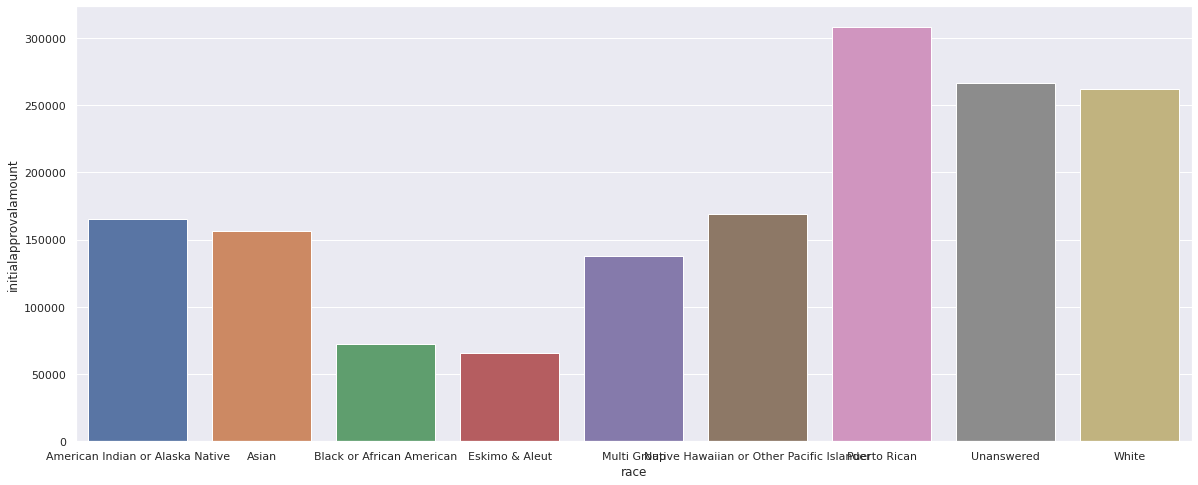

In [104]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'race',y = 'initialapprovalamount',data = race)
plt.show()

In [105]:
gender=df.groupby('gender').agg({'initialapprovalamount':'mean'}).reset_index()
print(' Average Loan Amount according to gender')
gender

 Average Loan Amount according to gender


,gender,initialapprovalamount
0,Female Owned,168500.157284
1,Male Owned,263120.185965
2,Unanswered,266009.441514


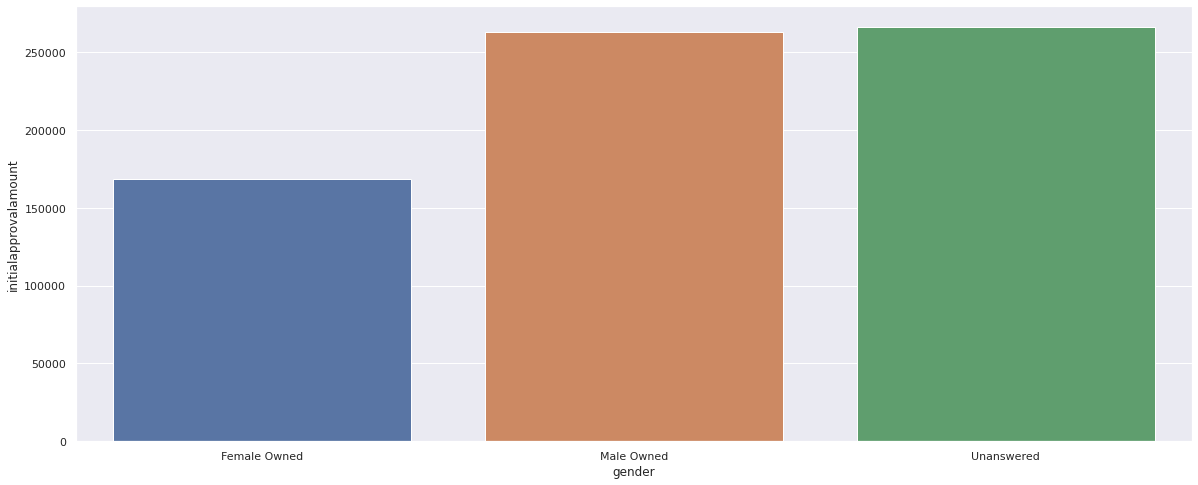

In [106]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'gender',y = 'initialapprovalamount',data = gender)
plt.show()

**Find a linear/non-linear relation between number of jobs reportedand loan amount.**

In [107]:
jr=df.groupby('jobsreported').agg({'initialapprovalamount':'sum'}).reset_index()
jr

,jobsreported,initialapprovalamount
0,-6.0,4.467875e+04
1,0.0,1.593361e+06
2,1.0,5.318580e+09
3,2.0,2.037406e+09
4,3.0,2.344701e+09
...,...,...
497,496.0,1.577322e+07
498,497.0,9.294530e+06
499,498.0,2.398771e+07
500,499.0,4.628242e+07


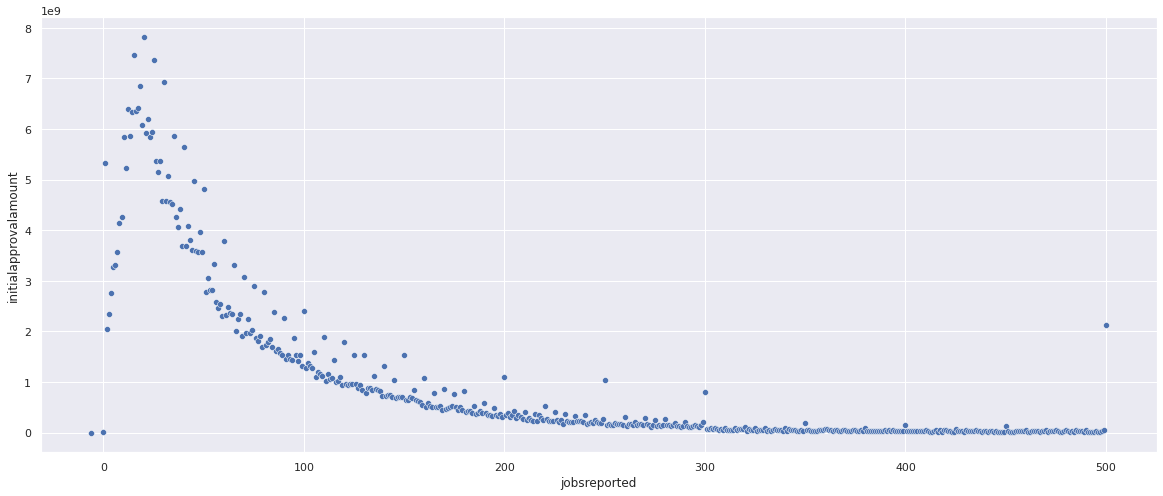

In [120]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'jobsreported',y = 'initialapprovalamount',data = jr)
plt.show()

**Amount of loan given by each lender etc.**

In [130]:
lendername=df.groupby('servicinglendername').agg({'initialapprovalamount':'sum'}).reset_index()
lendername

,servicinglendername,initialapprovalamount
0,"\tFarm Credit Services of Western Arkansas, ACA",9551532.26
1,"\tYankee Farm Credit, ACA",5184424.12
2,121 Financial CU,25051350.00
3,1st Advantage Bank,17744052.93
4,1st Advantage FCU,1511384.68
...,...,...
4281,i3 Bank,13156018.24
4282,iTHINK Financial CU,42341659.50
4283,"immito, LLC",43723876.50
4284,other,590400.94


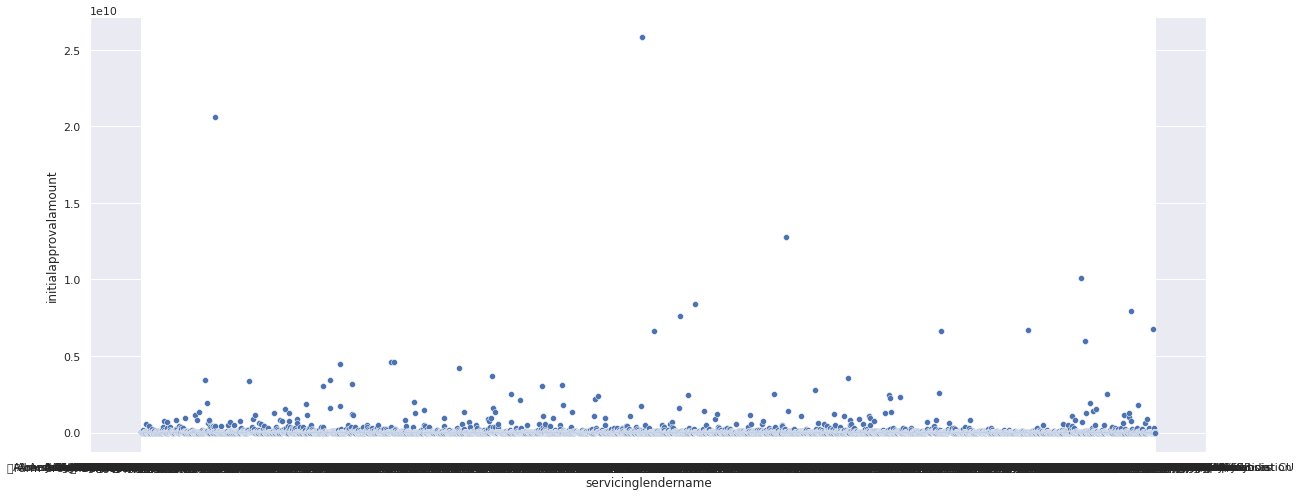

In [131]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'servicinglendername',y = 'initialapprovalamount',data = lendername)
plt.show()

# **CITY:**

**City wise distribution of businesses granted loans.**

In [132]:
bc=df.groupby('borrowercity').agg({'businesstype':'count'}).reset_index()
bc

,borrowercity,businesstype
0,"(North Hollywood Area), Los Angeles",1
1,", Albany",1
2,", Brooklyn",2
3,02155,1
4,100 Barranca Street,1
...,...,...
32914,yuba city,3
32915,yucaipa,2
32916,yucca valley,1
32917,yuma,15


**Highest loan lender in each city.**

In [111]:
maxcityloan=df.groupby('borrowercity').agg({'initialapprovalamount':'max'}).reset_index()
maxcityloan

,initialapprovalamount
borrowercity,
"(North Hollywood Area), Los Angeles",81172.0
", Albany",201100.0
", Brooklyn",240100.0
02155,943400.0
100 Barranca Street,20833.0
...,...
yuba city,314700.0
yucaipa,31720.0
yucca valley,94124.0


**Compare cities on the basis of loan amounts etc.**

In [112]:
maxcity=df.groupby('borrowercity').agg({'initialapprovalamount':'sum'}).reset_index()
maxcity

,initialapprovalamount
borrowercity,
"(North Hollywood Area), Los Angeles",81172.00
", Albany",201100.00
", Brooklyn",444900.00
02155,943400.00
100 Barranca Street,20833.00
...,...
yuba city,362920.00
yucaipa,52553.00
yucca valley,94124.00


# **BUSINESS TYPE:**

**Number of jobs reported by different business types.**

In [113]:
noj=df.groupby('businesstype').agg({'jobsreported':'count'}).reset_index()
noj

,jobsreported
businesstype,
"501(c) – Non Profit except 3,4,6,",15
501(c)19 – Non Profit Veterans,8
501(c)3 – Non Profit,2360
501(c)6 – Non Profit Membership,1163
Cooperative,3317
Corporation,673600
Employee Stock Ownership Plan(ESOP),589
Housing Co-op,151
Independent Contractors,39717


In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'businesstype',y = 'jobsreported',data = noj)
plt.show()

**Average Loan Amount per business type.**

In [114]:
alabt=df.groupby('businesstype').agg({'initialapprovalamount':'mean'}).reset_index()
alabt

,initialapprovalamount
businesstype,
"501(c) – Non Profit except 3,4,6,",280953.859333
501(c)19 – Non Profit Veterans,71608.000000
501(c)3 – Non Profit,431672.466017
501(c)6 – Non Profit Membership,306641.044368
Cooperative,399820.228390
Corporation,296833.281459
Employee Stock Ownership Plan(ESOP),843115.410917
Housing Co-op,341463.590066
Independent Contractors,14635.415204


In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'businesstype',y = 'initialapprovalamount',data = alabt)
plt.show()

**Compare loan amounts of Male Owned businesses VS FemaleOwned businesses etc.**

In [115]:
gender=df.groupby('gender').agg({'initialapprovalamount':'sum'}).reset_index()
gender

,initialapprovalamount
gender,
Female Owned,3.177728e+10
Male Owned,1.439575e+11
Unanswered,2.916605e+11


In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'gender',y = 'initialapprovalamount',data = gender)
plt.show()

# **DATE APPROVED:**

**Find months in which high amount of loans were sanctioned.**

In [116]:
month=df.groupby('dateapproved').agg({'initialapprovalamount':'max'})
month

,initialapprovalamount
dateapproved,
01/13/2021,815292.5
01/14/2021,1682345.0
01/15/2021,2000000.0
01/16/2021,2437400.0
01/17/2021,2000000.0
...,...
08/06/2020,2486167.0
08/07/2020,2597495.0
08/08/2020,2111738.0


**Find how many jobs were reported in the past months and predicthow many could be reported in the upcoming months.**

In [117]:
jpm=df.groupby('dateapproved').agg({'jobsreported':'count'})
jpm

,jobsreported
dateapproved,
01/13/2021,10
01/14/2021,225
01/15/2021,443
01/16/2021,4985
01/17/2021,3232
...,...
08/06/2020,1718
08/07/2020,2004
08/08/2020,655
